In [1]:
%cd ~/SSMuLA

/disk2/fli/SSMuLA


In [2]:
%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic

In [10]:
from glob import glob

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, to_rgb
import seaborn as sns

from SSMuLA.zs_analysis import ZS_OPTS, ZS_OPTS_LEGEND
# from SSMuLA.vis_summary import N_SAMPLE_LIST, N_MUT_SUBS, ZS_METRICS, ZS_N_MUTS
from SSMuLA.vis import PRESENTATION_PALETTE_SATURATE

from SSMuLA.landscape_global import get_file_name

%matplotlib inline

# Custom colormap for the MSE row, using greens
cmap_mse = LinearSegmentedColormap.from_list(
    "mse_cmap_r", ["#FFFFFF", "#9bbb59"][::-1], N=100
)  # dark to light green

# Create the colormap
custom_cmap = LinearSegmentedColormap.from_list(
    "bwg",
    [
        PRESENTATION_PALETTE_SATURATE["blue"],
        "white",
        PRESENTATION_PALETTE_SATURATE["green"],
    ],
    N=100,
)

custom_cmap_r = LinearSegmentedColormap.from_list(
    "bwg_r",
    [
        sns.dark_palette("seagreen").as_hex()[-1],
        "white",
        sns.color_palette("Blues").as_hex()[-1],
    ],
    N=100,
)

de_metrics = ["mean_all", "fraction_max"]

simple_des = {
    "recomb_SSM": "Recomb",
    "single_step_DE": "Single step",
    "top96_SSM": "Top96 recomb",
}

In [4]:
n_mut = "all"
metricr = "rho"

In [5]:
ZS_OPTS_LEGEND

{'none': 'Random',
 'ed_score': 'Hamming distance',
 'Triad_score': 'Triad',
 'ev_score': 'EVmutation',
 'esm_score': 'ESM',
 'esmif_score': 'ESM-IF',
 'coves_score': 'CoVES',
 'struc-comb_score': 'Triad + ESM-IF',
 'Triad-ev_score': 'Triad + EVmutation',
 'Triad-esm_score': 'Triad + ESM',
 'msanoif-comb_score': 'EVmutation + ESM',
 'two-best_score': 'EVmutation + ESM-IF',
 'msa-comb_score': 'EVmutation + ESM + ESM-IF',
 'structnmsa-comb_score': 'Triad + EVmutation + ESM + ESM-IF'}

In [11]:
ZS_OPTS

['ed_score',
 'ev_score',
 'esm_score',
 'esmif_score',
 'coves_score',
 'Triad_score']

In [12]:
zs_names = [ZS_OPTS_LEGEND[z] for z in ZS_OPTS]
zs_names

['Hamming distance', 'EVmutation', 'ESM', 'ESM-IF', 'CoVES', 'Triad']

Text(109.72222222222229, 0.5, 'ZS predictor')

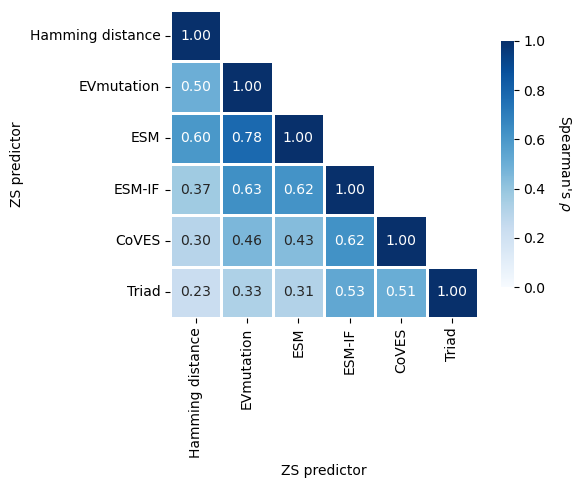

In [13]:
corr_dict = {}
for lib in ['DHFR', 'ParD2', 'ParD3', "T7", "TEV", 'GB1', 'TrpB3D', 'TrpB3E', 'TrpB3F','TrpB3G', 'TrpB3I', 'TrpB4']:

    lib_csv = f"results/zs_comb_5/none/scale2max/all/{lib}.csv"

    df = pd.read_csv(lib_csv)
    corr_dict[lib] = df[ZS_OPTS].corr(method="spearman", min_periods=1)

avg_corr_df = pd.DataFrame(np.nanmean(np.stack(list(corr_dict.values())),axis=0), index=zs_names, columns=zs_names)
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(avg_corr_df, dtype=bool))
# Modifying the mask to exclude the diagonal
np.fill_diagonal(mask, False)

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(6, 4))

# Draw the heatmap with the mask and correct aspect ratio
hm = sns.heatmap(
    avg_corr_df,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    cbar_kws={"shrink": 0.8},
    linewidths=0.8,
    square=True,
    vmin=0,
    vmax=1,
)  # Setting vmin and vmax
cbar = hm.collections[0].colorbar
# Add a title to the color bar
cbar.set_label(r"Spearman's $\rho$", rotation=270, labelpad=20)

  # Setting vmin and vmax
ax.set_xlabel("ZS predictor")
ax.set_ylabel("ZS predictor")
# Add titles and labels as necessary
# plt.title("ZS Correlations Average Across 10 Minimally Active Landscapes", fontweight="bold")
# plt.show()